# Titanic Survivor Analysis

###### Grayson Ricketts

## Question
#### How did gender affect the chance of surviving the Titanic disaster? Also, how did gender in addition to other factors affect the chance of surviving?

## Setup


In [2]:
%matplotlib inline

In [33]:
# Import magic
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Set general plot properties
sns.set_style("white")

In [4]:
# Load CSV data
titanic_data = pd.read_csv('titanic_data.csv')

## Wrangling

In [5]:
# Display the number of rows with gender and age data
print '''    Gender : %d
    Age : %d
    Total : %d''' % (titanic_data[pd.notnull(titanic_data['Sex']) == True].shape[0], 
                     titanic_data[pd.notnull(titanic_data['Age']) == True].shape[0], 
                     titanic_data.shape[0])

    Gender : 891
    Age : 714
    Total : 891


There are about 180 rows with no age data. Later on, when we want to make comparisions based on age this will become problematic. We will create a new dataframe to hold the rows that have age data.

In [32]:
# New dataframe
age_data = titanic_data[pd.notnull(titanic_data['Age'])]

# Round the ages to integers
age_data.loc[:, 'Age'] = age_data['Age'].apply(lambda x : int(x))

# Group age_data by gender
m_age_data = age_data[age_data['Sex'] == 'male']
f_age_data = age_data[age_data['Sex'] == 'female']

Later on, we will want to see how pclass relates to survival. This method groups people into classes.

In [7]:
'''
Return a tuple containing three groups. Each group will be the members of a pclass.
'''
def group_by_class(df):
    df_first = df[df['Pclass'] == 1]
    df_second = df[df['Pclass'] == 2]
    df_third = df[df['Pclass'] == 3]
    
    return (df_first, df_second, df_third)

We want to see what factors affect the chance of surviving, so this method splits a dataframe into two dataframes. The first will hold those who survived the second will hold those who did not survive.

In [8]:
'''
Return a tuple containing two collections. The first containing those who survived
and the second containing those who died.
'''
def group_by_survived(df):
    survived = df[df['Survived'] == 1]
    died = df[df['Survived'] == 0]
    
    return (survived, died)

## Evaluation and Exploration

Let's begin by looking at some general distributions.

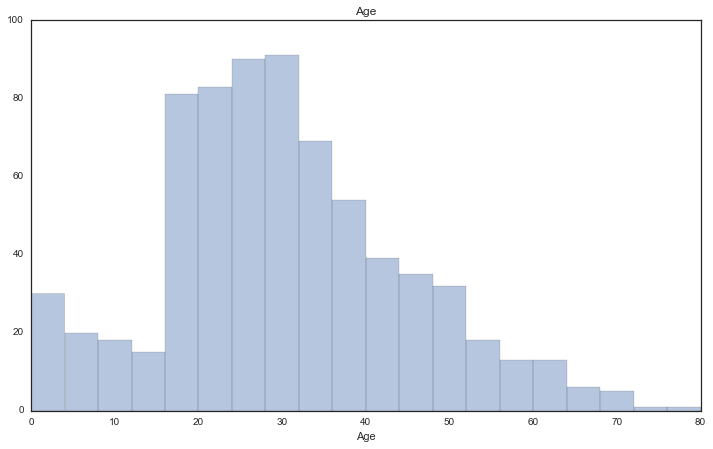

In [34]:
plt1 = sns.distplot(age_data['Age'], kde=False, bins=20)

# Set the size
plt1.figure.set_size_inches(12, 7)

In [46]:
x = 1
for group in group_by_class(titanic_data):
    print 'Number of people in %s class: %d' % (x, group.shape[0])
    x += 1
    
print '\nProportion of people in third class: %.2f%%\n' % (float(group_by_class(age_data)[2].shape[0]*100) /
                                                       age_data.shape[0])

print 'Number of females: %d' % titanic_data[titanic_data['Sex'] == 'female'].shape[0]
print 'Number of males: %d' % titanic_data[titanic_data['Sex'] == 'male'].shape[0]

Number of people in 1 class: 216
Number of people in 2 class: 184
Number of people in 3 class: 491

Proportion of people in third class: 49.72%

Number of females: 314
Number of males: 577


Now we will begin to answer our question of how gender affects survival by looking at some basic statistics about each gender group.

In [9]:
gender_grouped = titanic_data.groupby('Sex')

In [45]:
# Difference between men and women
gender_grouped.get_group('male')[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe() - \
        gender_grouped.get_group('female')[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,263.000000,192.000000,263.000000,263.000000,263.000000
mean,0.230712,2.810936,-0.264458,-0.413980,-18.955924
std,-0.043710,0.568054,-0.094709,-0.410552,-14.859435
min,0.000000,-0.330000,0.000000,0.000000,-6.750000
25%,1.000000,3.000000,0.000000,0.000000,-4.176075
50%,1.000000,2.000000,0.000000,0.000000,-12.500000
75%,0.000000,2.000000,-1.000000,-1.000000,-28.450000
max,0.000000,17.000000,0.000000,-1.000000,0.000000


Most of these distributuion statistics seem very similiar with the exception of Fare. It would seem logical that Fare and Pclass are connected, but for some reason the Pclass statistics are similiar.

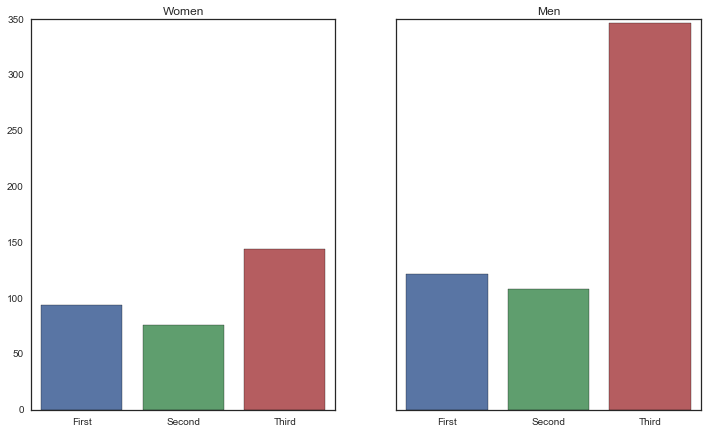

In [31]:
# Group men and women by class
male_class = group_by_class(gender_grouped.get_group('male'))
female_class = group_by_class(gender_grouped.get_group('female'))

# Setup for side-by-side figures
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# Show the how many women (men) were in first, second, or third class
plt1 = sns.barplot(x=['First', 'Second', 'Third'], y=[female_class[0].shape[0], 
                                               female_class[1].shape[0], female_class[2].shape[0]], 
                                            ax=ax1)
plt2 = sns.barplot(x=['First', 'Second', 'Third'], y=[male_class[0].shape[0], 
                                               male_class[1].shape[0], male_class[2].shape[0]], 
                                            ax=ax2)

# Set the title for the barplots and the size
plt1.set(title='Women')
plt2.set(title='Men')
plt1.figure.set_size_inches(12, 7)

It appears that the difference in the Fare statistics is because there are many more males in third class, so the mean fare for females was much higher because there was a smaller proportion of females in third class. 

Now that the general differences between males and females have been explored, let's look at how gender affects the chance of surviving. We'll start by just looking at how many died and survived from each group.

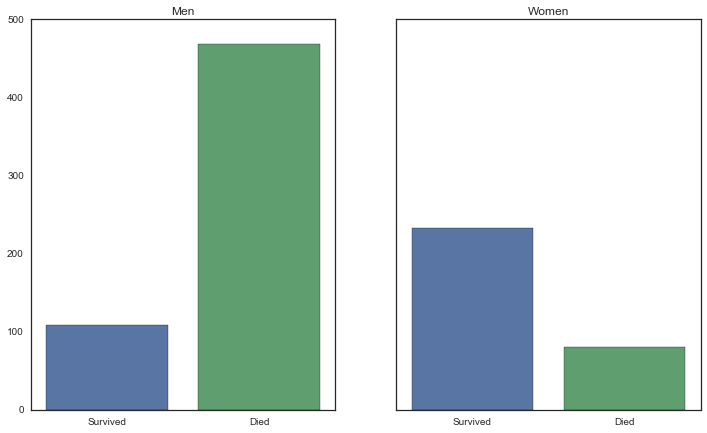

In [12]:
# Get the number of men who survived and died
m_survived = group_by_survived(gender_grouped.get_group('male'))[0].shape[0]
m_died = group_by_survived(gender_grouped.get_group('male'))[1].shape[0]

# Get the number of women who survived and died
f_survived = group_by_survived(gender_grouped.get_group('female'))[0].shape[0]
f_died = group_by_survived(gender_grouped.get_group('female'))[1].shape[0]

# Set up the plots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# Makes barplots showing the number who died and survived for each group
plt1 = sns.barplot(x=['Survived', 'Died'], y=[f_survived, f_died], ax=ax2)
plt2 = sns.barplot(x=['Survived', 'Died'], y=[m_survived, m_died], ax=ax1)

# Set the title for the barplots and the size
plt1.set(title='Women')
plt2.set(title='Men')
plt1.figure.set_size_inches(12, 7)

In [30]:
print "Number of males who survived: %d" % (m_survived)
print "Proportion of males who survived: %.2f%%\n" % ((float(m_survived * 100) / (m_died+m_survived)))

print "Number of females who survived: %d" % (f_survived)
print "Proportion of females who survived: %.2f%%" % ((float(f_survived * 100) / (f_died+f_survived)))

Number of males who survived: 109
Proportion of males who survived: 18.89%

Number of females who survived: 233
Proportion of females who survived: 74.20%


A larger **proportion** and **number** of women survived the disaster than men. It appears that gender is correlated to surviving the disaster. For men the correlation is negative and women the correlation is positive. 

Now that we've explored how gender alone affects surviving the disaster, let's look deeper. Specifically let's answer the question, how do other factors in addition to gender affect the chance of surviving? Let's first look at how **gender** and **age** affect the chance of surviving.

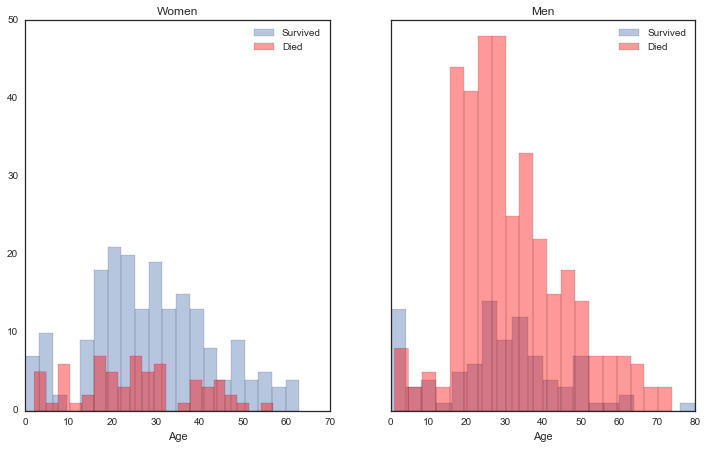

In [16]:
# Seperate the women with age data who survived into two groups
f_age_survived_groups = group_by_survived(f_age_data)

# Seperate the men with age data who survived into two groups
m_age_survived_groups = group_by_survived(m_age_data)

# Figure setup
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# Histogram showing the number of people who died (survived) at a certain age in red (blue) for women
sns.distplot(f_age_survived_groups[0]['Age'], kde=False, ax=ax1, bins=20, label='Survived')
plt1 = sns.distplot(f_age_survived_groups[1]['Age'], kde=False, ax=ax1, bins=20, color='r', label='Died')

# Histogram showing the number of people who died (survived) at a certain age in red (blue) for men
sns.distplot(m_age_survived_groups[0]['Age'], kde=False, ax=ax2, bins=20, label='Survived')
plt2 = sns.distplot(m_age_survived_groups[1]['Age'], kde=False, ax=ax2, bins=20, color='r', label='Died')

# Set titles and size of graphs
plt1.set(title='Women')
plt2.set(title='Men')
plt1.legend(loc='upper right')
plt2.legend(loc='upper right')
plt1.figure.set_size_inches(12, 7)

From this it appears that women of all ages had a fairly good chance of surviving and that male children had a better chance of surviving than adult males. Unexpectedely, female children seemed to have a lower chance of surviving than older women.

There seems to be another factor involved. Let's examine how pclass affected survival.

In [17]:
# Females grouped by those who survived (died) and their pclass. Each variable
# is a tuple with each element representing a group who all share the same pclass.
f_class_age_survived = group_by_class(f_age_survived_groups[0])
f_class_age_died = group_by_class(f_age_survived_groups[1])

# Males grouped by those who survived (died) and their pclass. Each variable
# is a tuple with each element representing a group who all share the same pclass.
m_class_age_survived = group_by_class(m_age_survived_groups[0])
m_class_age_died = group_by_class(m_age_survived_groups[1])

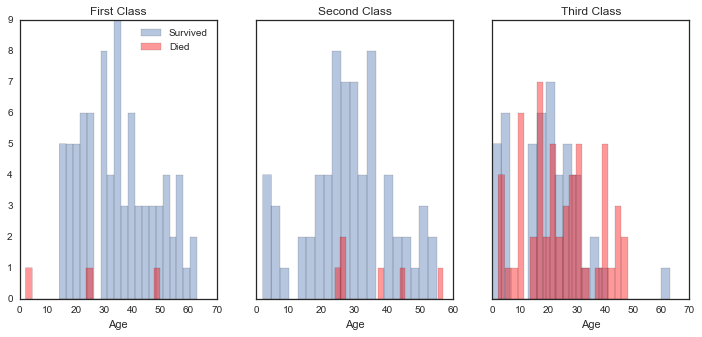

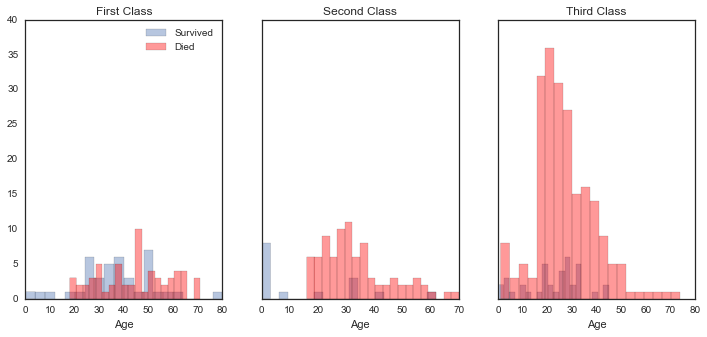

In [19]:
# Plot setup for females
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)

# Plots for females
sns.distplot(f_class_age_survived[0]['Age'], kde=False, bins=20, ax=ax1, label='Survived')
fig1 = sns.distplot(f_class_age_died[0]['Age'], kde=False, color='r', bins=20, ax=ax1, label='Died')
sns.distplot(f_class_age_survived[1]['Age'], kde=False, bins=20, ax=ax2)
fig2 = sns.distplot(f_class_age_died[1]['Age'], kde=False, color='r', bins=20, ax=ax2)
sns.distplot(f_class_age_survived[2]['Age'], kde=False, bins=20, ax=ax3)
fig3 = sns.distplot(f_class_age_died[2]['Age'], kde=False, color='r', bins=20, ax=ax3)

# Titles
fig1.set(title='First Class')
fig1.legend(loc='upper right')
fig2.set(title='Second Class')
fig3.set(title='Third Class')
fig1.figure.set_size_inches(12,5)

# Plot setup for males
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)

# Plots for males
sns.distplot(m_class_age_survived[0]['Age'], kde=False, bins=20, ax=ax1, label='Survived')
fig1 = sns.distplot(m_class_age_died[0]['Age'], kde=False, color='r', bins=20, ax=ax1, label='Died')
sns.distplot(m_class_age_survived[1]['Age'], kde=False, bins=20, ax=ax2)
fig2 = sns.distplot(m_class_age_died[1]['Age'], kde=False, color='r', bins=20, ax=ax2)
sns.distplot(m_class_age_survived[2]['Age'], kde=False, bins=20, ax=ax3)
fig3 = sns.distplot(m_class_age_died[2]['Age'], kde=False, color='r', bins=20, ax=ax3)

# Titles
fig1.set(title='First Class')
fig1.legend(loc='upper right')
fig2.set(title='Second Class')
fig3.set(title='Third Class')
fig1.figure.set_size_inches(12,5)

It appears that there is a correlation between pclass and surviving the disaster in addition to gender. Specifically, the lower pclasses, especially third class, seem to have a much lower chance of surviving. However, children seemed to have a higher chance of surviving within any pclass.

For instance, all male children in first and second class surived. Male children in third class did not have as high a chance of surviving, but it appears that a much greater proportion of male children in third class survived then adult males in third class. What is said about male children can also be said about female children with the exception of one child in first class.

## Conclusion

Within the sample given women had a much better chance of surviving the Titanic disaster. However, there were other factors in addition to gender (age, pclass) that affected the chance of surivival. Below is more detailed list of how these factors affected survival

* Age
    * Male children in first and second class all survived.
    * Male children in third class had a better chance of surviving than their adult male counterparts
    * Nearly all female children in first and second class survived
* Pclass
    * A greater proportion of males in second and third class died than males in first class
    * A very low proportion of females in first and second class died
    
Overall, the findings are interesting but the findings are only about a sample of 891 people out of roughly 2,200 people that were in the disaster. In addition, all the conclusions from the age data represent only 714 people, about one-third the total population. To make definitive conlcusions about what affected survival we must calculate statistical power or (because it is feasible) look at the entire population.